# Projekt MSP1 / 2024
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 27. 10. 2024 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

Timotej Halenár
xhalen00

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [144]:
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        if filename.endswith('.json'):
            with zf.open(filename, "r") as f:
                content = f.read().decode('utf-8')
                json_data = json.loads(content)
                data.append(json_data)

df = pd.DataFrame(data)
df

,configuration,run,runtime,status
0,config6,149,53.733556,SUCCESS
1,config2,16,134.543496,SUCCESS
2,config6,180,117.108040,SUCCESS
3,config4,12,223.763044,SUCCESS
4,config5,193,159.540473,SUCCESS
...,...,...,...,...
1195,config5,95,199.461297,SUCCESS
1196,config5,99,155.491930,SUCCESS
1197,config2,83,125.243690,SUCCESS
1198,config5,153,223.312938,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

outliers count:  24


<Axes: xlabel='configuration', ylabel='runtime'>

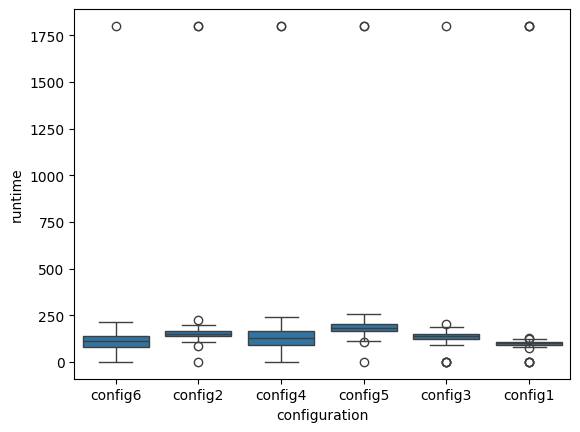

In [145]:
#https://stackoverflow.com/a/43093390
q_low = df["runtime"].quantile(0.01)
q_hi  = df["runtime"].quantile(0.99)

outliers = df[(df['runtime'] >= q_hi) | (df['runtime'] <= q_low)]

print("outliers count: ", outliers.shape[0])
sns.boxplot(x='configuration', y='runtime', data=df)

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_

- ak algoritmus zlyhal, môže mať čas behu 0
- príp. ak algoritmus beží príliš dlho, dostane sa na maximálnu hodnotu (TIMEOUT) 1800


Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

<Axes: xlabel='configuration', ylabel='runtime'>

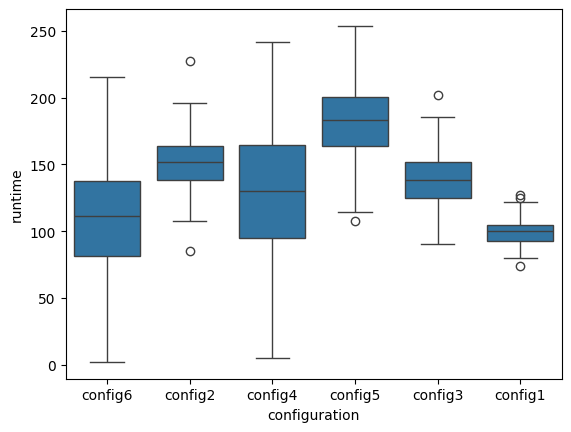

In [146]:
df = df[(df['runtime'] < q_hi) & (df['runtime'] > q_low)]

sns.boxplot(x='configuration', y='runtime', data=df)

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [147]:
df_1 = df[df['configuration'] == "config1"]
df_2 = df[df['configuration'] == "config2"]
df_3 = df[df['configuration'] == "config3"]
df_4 = df[df['configuration'] == "config4"]
df_5 = df[df['configuration'] == "config5"]
df_6 = df[df['configuration'] == "config6"]

def get_stats(frame):
    stats = frame["runtime"].describe()
    print(stats[['mean', 'std', 'min', 'max']])
    #print(stats)

print("*********************************")
print("Config 1")
get_stats(df_1)
print("*********************************")
print("Config 2")
get_stats(df_2)
print("*********************************")
print("Config 3")
get_stats(df_3)
print("*********************************")
print("Config 4")
get_stats(df_4)
print("*********************************")
print("Config 5")
get_stats(df_5)
print("*********************************")
print("Config 6")
get_stats(df_6)
print("*********************************")

*********************************
Config 1
mean     99.590413
std       9.386788
min      73.802549
max     127.201692
Name: runtime, dtype: float64
*********************************
Config 2
mean    151.732975
std      19.833198
min      85.174653
max     227.054630
Name: runtime, dtype: float64
*********************************
Config 3
mean    138.616959
std      19.867428
min      90.567110
max     201.577616
Name: runtime, dtype: float64
*********************************
Config 4
mean    127.606156
std      50.282164
min       4.970286
max     241.987620
Name: runtime, dtype: float64
*********************************
Config 5
mean    183.291664
std      28.333830
min     107.283620
max     253.659004
Name: runtime, dtype: float64
*********************************
Config 6
mean    110.422689
std      40.875754
min       2.124534
max     215.295283
Name: runtime, dtype: float64
*********************************


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

In [148]:
# TODO

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. 

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vybraného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

In [149]:
# TODO: Implementace s využitím knihovní funkcí


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [150]:
# TODO vlastni implementace zvoleneho testu